In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
bond_types = ['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
pickles = [i for i in os.listdir('data') if ".pkl" in i]
#dfs = {i[:-4] : pd.read_pickle('data/'+i) for i in pickles}
#print ("\t".join(dfs.keys()))
print (pickles)

['traintestadj.pkl', 'distances.pkl', 'magnetic_shielding_tensors.pkl', 'traintestpathfixed.pkl', 'df_graph_fixed.pkl', 'test.pkl', 'traintest.pkl', 'dipole_moments.pkl', 'structures_reindexed.pkl', 'lengthes_4.pkl', 'train_contrib.pkl', 'df_graph.pkl', 'train.pkl', 'potential_energy.pkl', 'struc_and_dist.pkl', 'structures.pkl', 'traintestpath.pkl', 'dist_df.pkl', 'mulliken_charges.pkl', 'traintestadjfixed.pkl']


In [57]:
traintestpath = pd.read_pickle('data/traintestpathfixed.pkl')
traintest = pd.read_pickle('data/traintest.pkl')

In [89]:
traintest

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.80760
1,dsgdb9nsd_000001,1,2,2JHH,-11.25700
2,dsgdb9nsd_000001,1,3,2JHH,-11.25480
3,dsgdb9nsd_000001,1,4,2JHH,-11.25430
4,dsgdb9nsd_000001,2,0,1JHC,84.80740
5,dsgdb9nsd_000001,2,3,2JHH,-11.25410
6,dsgdb9nsd_000001,2,4,2JHH,-11.25480
7,dsgdb9nsd_000001,3,0,1JHC,84.80930
8,dsgdb9nsd_000001,3,4,2JHH,-11.25430


In [58]:
traintestadj = pd.read_pickle('data/traintestadjfixed.pkl')

In [59]:
traintestadj.loc[1903].AdjMatrix

array([[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [60]:
struc_and_dist = pd.read_pickle('data/struc_and_dist.pkl')

In [61]:
len(traintest)

7163689

In [62]:
types = traintest.type.apply(lambda x: int(x[:1]))

In [63]:
pathlen = traintestpath.apply(lambda x: len(x) - 1)

In [64]:
traintestpath

id
0                  [1, 0]
1               [1, 0, 2]
2               [1, 0, 3]
3               [1, 0, 4]
4                  [2, 0]
5               [2, 0, 3]
6               [2, 0, 4]
7                  [3, 0]
8               [3, 0, 4]
9                  [4, 0]
10                 [1, 0]
11              [1, 0, 2]
12              [1, 0, 3]
13                 [2, 0]
14              [2, 0, 3]
15                 [3, 0]
16              [1, 0, 2]
17                 [2, 0]
18              [2, 0, 1]
19                 [2, 0]
20              [2, 0, 1]
21              [2, 0, 3]
22              [2, 0, 4]
23           [2, 0, 1, 5]
24           [2, 0, 1, 6]
25           [2, 0, 1, 7]
26                 [3, 0]
27              [3, 0, 1]
28              [3, 0, 4]
29           [3, 0, 1, 5]
                ...      
7163659           [12, 3]
7163660        [12, 3, 4]
7163661     [12, 3, 2, 6]
7163662     [12, 3, 8, 7]
7163663        [12, 3, 8]
7163664    [12, 3, 4, 13]
7163665    [12, 3, 8, 15]
7163666  

In [65]:
len(np.where((types - pathlen).values)[0])

1

In [68]:
bad = traintest.iloc[np.where(((types - pathlen).values))]

In [69]:
bad.type.unique()

array(['3JHC'], dtype=object)

In [70]:
len(pathlen)

7163689

In [24]:
traintestpath.loc[1903]

[7, 1, 3]

In [71]:
bad

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
4656942,dsgdb9nsd_133831,17,2,3JHC,-1.47775


In [100]:
def get_color(atom):
    if atom == 'F':
        return 'green'
    if atom == 'C':
        return 'black'
    if atom == 'H':
        return 'cyan'
    if atom == 'O':
        return 'red'
    if atom == 'N':
        return 'blue'

def draw(st_dist):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    xs = st_dist.x
    ys = st_dist.y
    zs = st_dist.z
    ax.scatter(xs, ys, zs, color=[get_color(i) for i in st_dist.atom], s=100)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    for ind0 in st_dist.index:
        series = st_dist.loc[ind0]
        atom0 = series.atom
        ax.text3D(series.x, series.y,series.z, str(ind0), color="magenta", fontsize=14)
        for ind1, dist in zip(series.nn_indices[:4], series.nn_distances[:4]):
            atom1 = st_dist.loc[ind1].atom
            if ('H' == atom0) or ('H' == atom1):
                threash = 1.35
            else:
                threash = 1.82
            if dist < threash:
                x_line = np.linspace(series.x, st_dist.loc[ind1].x, 3)
                y_line = np.linspace(series.y, st_dist.loc[ind1].y, 3)
                z_line = np.linspace(series.z, st_dist.loc[ind1].z, 3)
                ax.plot3D(x_line, y_line, z_line, 'gray')
                
            
            

    plt.show()

<IPython.core.display.Javascript object>


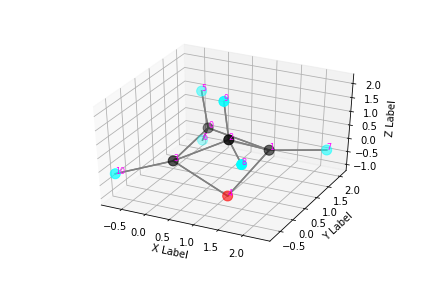

In [23]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_000106'])


In [54]:
f = lambda s1, s2: np.sqrt( (s1.x - s2.x)**2 + (s1.y - s2.y)**2 + (s1.z - s2.z)**2)

In [33]:
oo9 = struc_and_dist.loc['dsgdb9nsd_000106'].loc[1]
oo8 = struc_and_dist.loc['dsgdb9nsd_000106'].loc[3]
f(oo9,oo8)

1.7849973929141303

In [56]:
oo9 = struc_and_dist.loc['dsgdb9nsd_000106'].loc[2]
oo8 = struc_and_dist.loc['dsgdb9nsd_000106'].loc[4]
f(oo9,oo8)

2.121929542584497

In [55]:
struc_and_dist.loc['dsgdb9nsd_000106']

,atom,x,y,z,nn_indices,nn_distances
atom_index,,,,,,
0,C,-0.061780,1.593135,0.024718,"[6, 5, 3, 1, 4, 2, 10, 7, 9, 8]","[1.0904865407309723, 1.0933016695076225, 1.547..."
1,C,1.432536,1.191090,0.013062,"[7, 4, 0, 2, 3, 8, 6, 5, 9, 10]","[1.0905353667211748, 1.482424127639601, 1.5475..."
2,C,1.154347,0.137531,1.111873,"[8, 9, 3, 1, 4, 0, 10, 7, 5, 6]","[1.090486725974986, 1.0933007065734153, 1.5475..."
3,C,0.059590,0.050406,0.021610,"[10, 4, 0, 2, 1, 8, 6, 5, 9, 7]","[1.0905355007191628, 1.4824247239733408, 1.547..."
4,O,1.118426,0.164871,-1.009577,"[1, 3, 2, 0, 10, 7, 8, 6, 5, 9]","[1.482424127639601, 1.4824247239733408, 2.1219..."
5,H,-0.460810,2.080112,0.918550,"[0, 6, 3, 1, 9, 2, 10, 7, 4, 8]","[1.0933016695076225, 1.8231581579894514, 2.279..."
6,H,-0.430756,2.030281,-0.903679,"[0, 5, 3, 1, 4, 10, 7, 2, 9, 8]","[1.0904865407309723, 1.8231581579894514, 2.239..."
7,H,2.316621,1.808654,-0.149035,"[1, 4, 2, 0, 8, 6, 3, 9, 5, 10]","[1.090535366721175, 2.208670985882266, 2.39445..."
8,H,1.851135,-0.700953,1.136198,"[2, 9, 3, 1, 4, 10, 7, 0, 5, 6]","[1.0904867259749857, 1.8231619922754532, 2.239..."


In [32]:
 struc_and_dist.loc['dsgdb9nsd_059827']

,atom,x,y,z,nn_indices,nn_distances
atom_index,,,,,,
0,C,0.322758,1.239766,0.049448,"[12, 10, 11, 1, 2, 4, 3, 14, 17, 16, 15, 13, 5...","[1.102664928768635, 1.1032764424214307, 1.1038..."
1,N,-0.179203,-0.213520,-0.087481,"[2, 0, 3, 4, 14, 15, 12, 10, 16, 17, 11, 13, 5...","[1.0626187829016327, 1.543617442426348, 1.5652..."
2,H,0.034649,-0.534952,-1.077485,"[1, 3, 0, 4, 17, 10, 11, 13, 14, 5, 15, 16, 12...","[1.062618782901633, 2.121322319864002, 2.12193..."
3,C,0.532395,-1.233718,0.862614,"[15, 14, 13, 1, 2, 0, 9, 4, 10, 12, 16, 5, 6, ...","[1.103183058701712, 1.104722683726269, 1.24794..."
4,C,-1.776104,-0.309220,0.039062,"[16, 17, 5, 1, 2, 0, 3, 6, 15, 11, 12, 13, 14,...","[1.1109687559891637, 1.11177791246826, 1.45706..."
5,C,-2.128218,-1.713412,-0.126155,"[6, 4, 16, 17, 1, 13, 2, 7, 3, 15, 9, 8, 0, 14...","[1.2252797637698682, 1.4570640558771804, 2.169..."
6,C,-1.958814,-2.924436,-0.203821,"[5, 7, 9, 13, 8, 4, 3, 2, 1, 16, 17, 15, 14, 0...","[1.2252797637698687, 1.6397414255161653, 2.360..."
7,C,-0.971158,-4.230579,-0.118493,"[8, 9, 6, 13, 5, 3, 2, 15, 4, 1, 14, 16, 17, 0...","[1.2585214214499427, 1.3274055286128914, 1.639..."
8,O,-1.374324,-5.406222,-0.316473,"[7, 9, 6, 13, 5, 3, 4, 2, 15, 1, 14, 16, 17, 0...","[1.2585214214499427, 2.364241783439661, 2.5521..."


<IPython.core.display.Javascript object>


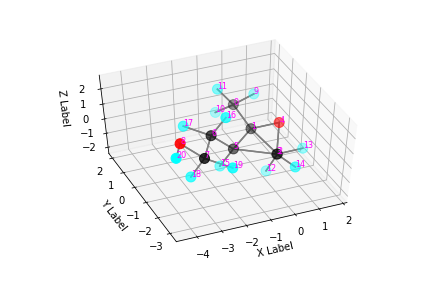

In [34]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_120157'])

<IPython.core.display.Javascript object>


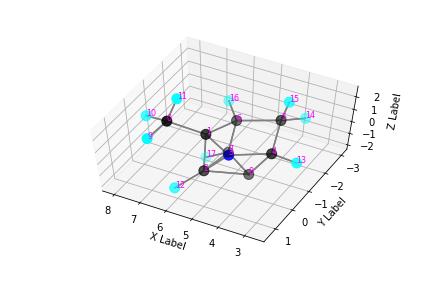

In [86]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_133831'])

<IPython.core.display.Javascript object>


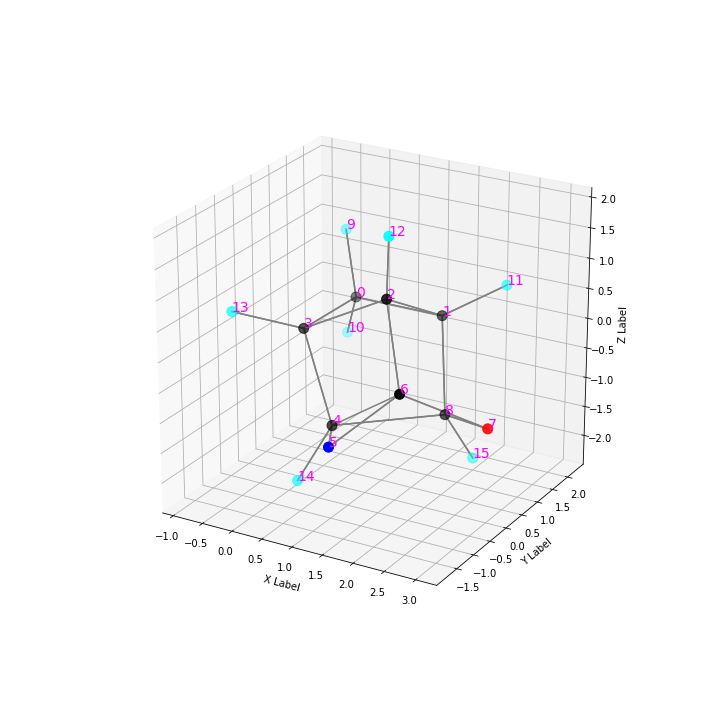

In [102]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_037494'])

<IPython.core.display.Javascript object>


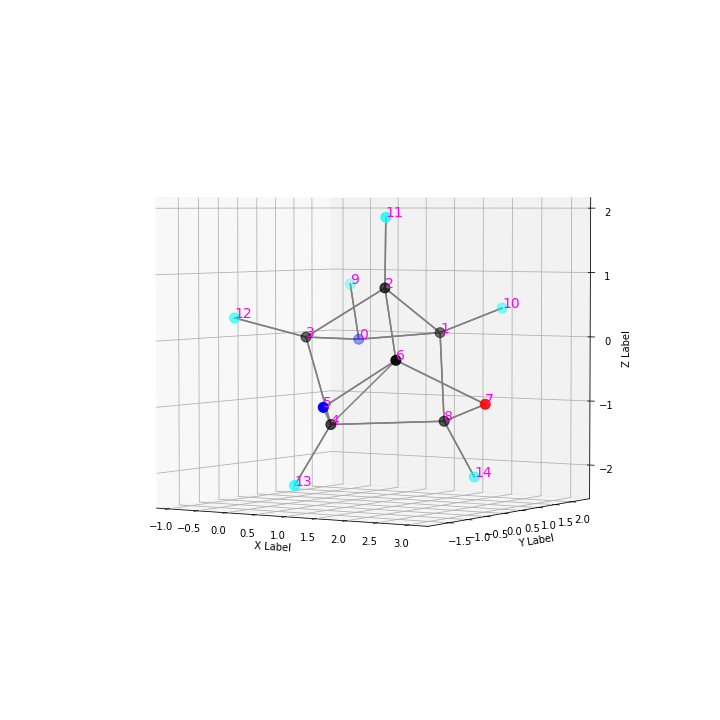

In [101]:
%matplotlib notebook
#plt.figure(figsize=(10,10))
draw(struc_and_dist.loc['dsgdb9nsd_037498'])

<IPython.core.display.Javascript object>


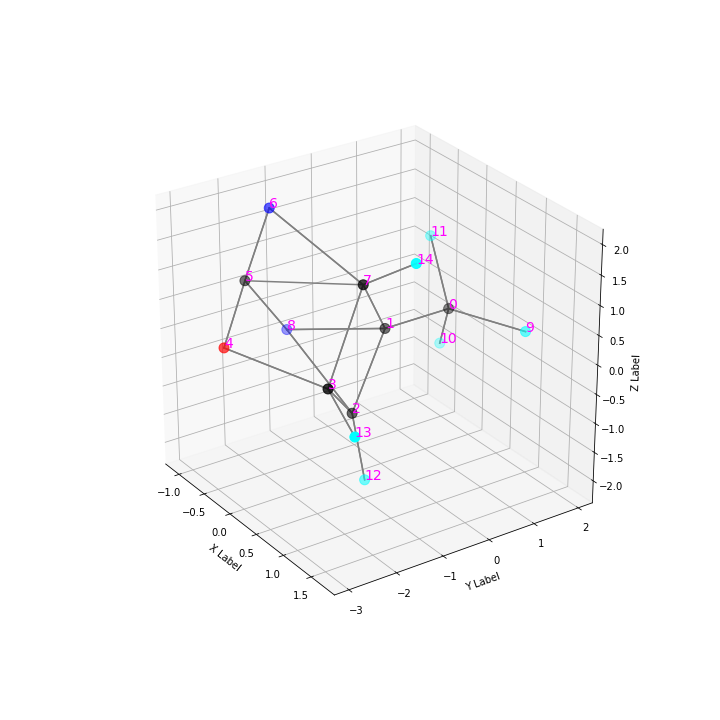

In [104]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_066495'])

<IPython.core.display.Javascript object>


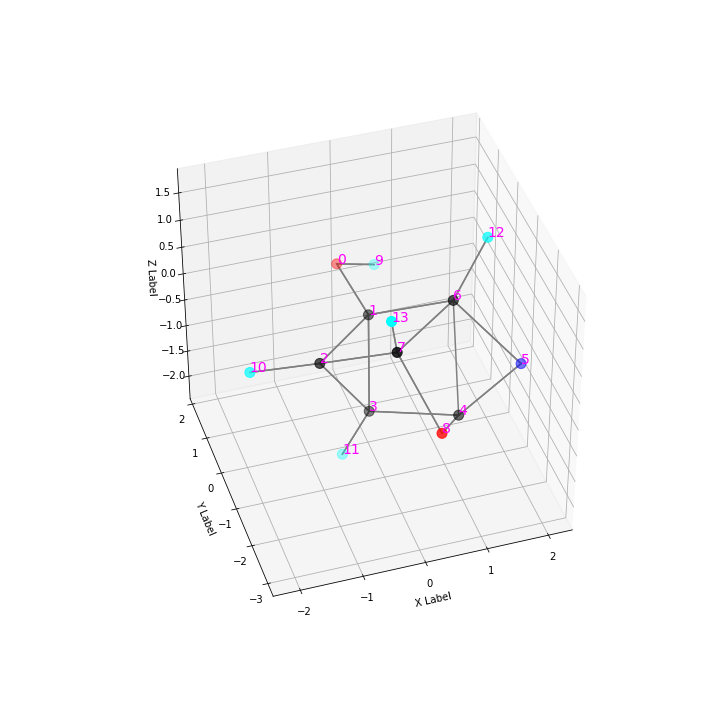

In [105]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_066499'])

<IPython.core.display.Javascript object>


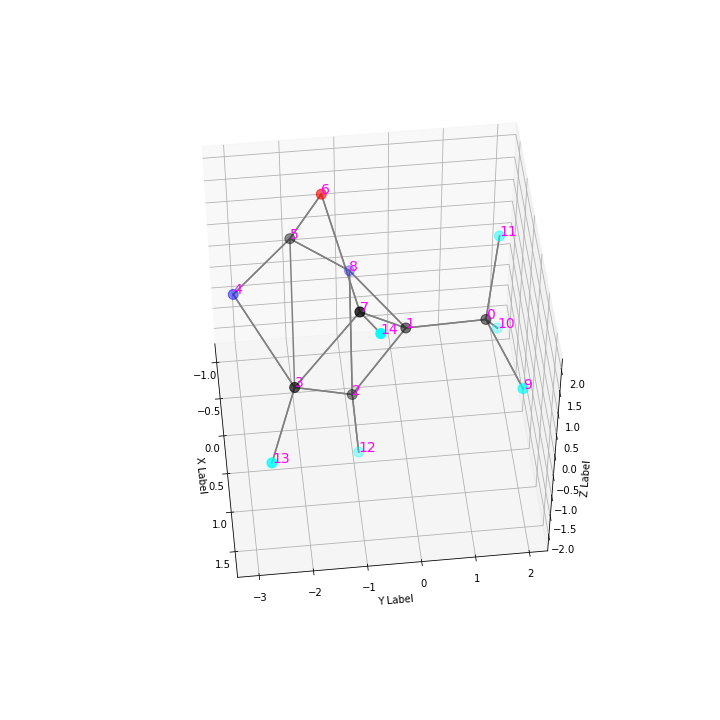

In [106]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_066503'])

<IPython.core.display.Javascript object>


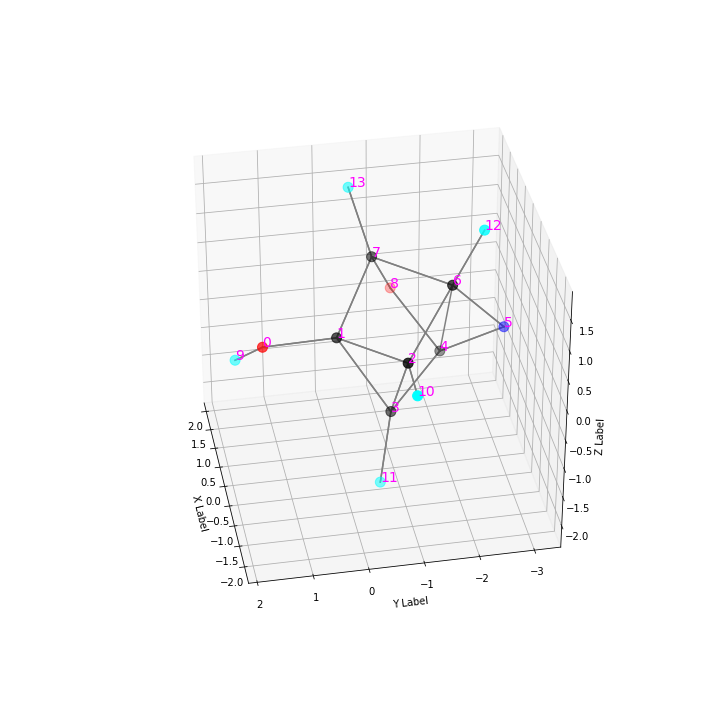

In [107]:
%matplotlib notebook
draw(struc_and_dist.loc['dsgdb9nsd_066506'])

In [103]:
traintest.loc[traintest.molecule_name.isin([
    'dsgdb9nsd_037494',
    #'dsgdb9nsd_037498',
    #'dsgdb9nsd_066495',
    #'dsgdb9nsd_066499',
    #'dsgdb9nsd_066503',
    #'dsgdb9nsd_066506',
    #'dsgdb9nsd_133831'
])]

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
1097552,dsgdb9nsd_037494,9,0,1JHC,89.206800
1097553,dsgdb9nsd_037494,9,1,2JHC,-0.274252
1097554,dsgdb9nsd_037494,9,2,3JHC,1.558090
1097555,dsgdb9nsd_037494,9,3,2JHC,-0.069931
1097556,dsgdb9nsd_037494,9,4,3JHC,8.799300
1097557,dsgdb9nsd_037494,9,8,3JHC,7.798730
1097558,dsgdb9nsd_037494,9,10,2JHH,-7.858110
1097559,dsgdb9nsd_037494,9,11,3JHH,3.175060
1097560,dsgdb9nsd_037494,9,13,3JHH,2.757450


dsgdb9nsd_037498	14	8	1JHC	106.968000
dsgdb9nsd_037498	14	6	3JHC	6.029080
dsgdb9nsd_037498    13	6	3JHC	8.846760

dsgdb9nsd_037494	15	6	3JHC	5.922930
dsgdb9nsd_037494	15	8	1JHC	104.923000
dsgdb9nsd_037494	14	6	3JHC	9.347640

In [76]:
struc_and_dist.loc['dsgdb9nsd_133831']

,atom,x,y,z,nn_indices,nn_distances
atom_index,,,,,,
0,C,7.129071,-0.239474,1.543318,"[9, 10, 11, 1, 3, 2, 6, 16, 12, 7, 5, 4, 15, 1...","[1.0936481438569687, 1.0947937007764659, 1.096..."
1,C,5.958452,-0.605155,0.689425,"[3, 0, 6, 2, 7, 9, 11, 10, 16, 4, 12, 5, 8, 15...","[1.4379673732459057, 1.4943911073799605, 1.534..."
2,C,5.376736,0.394056,-0.420774,"[12, 3, 1, 8, 7, 4, 17, 6, 0, 9, 5, 13, 10, 16...","[1.082126672231545, 1.4901132266898676, 1.6029..."
3,N,4.686676,0.045639,0.853141,"[1, 2, 4, 13, 8, 12, 6, 5, 0, 7, 9, 15, 11, 16...","[1.4379673732459057, 1.4901132266898676, 1.517..."
4,C,3.706846,-0.883421,0.161110,"[13, 3, 5, 8, 2, 14, 15, 6, 7, 1, 12, 16, 17, ...","[1.0871953036857533, 1.5172764457399044, 1.529..."
5,C,4.264275,-2.285961,0.408813,"[14, 15, 4, 6, 13, 16, 7, 1, 3, 8, 2, 17, 0, 1...","[1.094377882830254, 1.094968235802903, 1.52944..."
6,C,5.696221,-1.937289,-0.025328,"[16, 1, 5, 7, 14, 15, 4, 17, 2, 3, 8, 0, 10, 1...","[1.0862217607441444, 1.5343461086459356, 1.536..."
7,C,5.460571,-1.109092,-1.300275,"[17, 8, 6, 2, 1, 16, 4, 5, 3, 12, 14, 13, 15, ...","[1.0848807205036324, 1.424856094088563, 1.5384..."
8,C,4.221902,-0.407097,-1.244437,"[7, 4, 2, 3, 17, 13, 6, 12, 5, 1, 14, 16, 15, ...","[1.424856094088563, 1.5709013688562445, 1.6290..."


In [77]:
traintestpath[4656942]

[17, 7, 2]

In [80]:
oo9 = struc_and_dist.loc['dsgdb9nsd_133831'].loc[2]
oo8 = struc_and_dist.loc['dsgdb9nsd_133831'].loc[7]
f(oo9,oo8)

1.7435612228400652